**[LeetCode Link](https://leetcode-cn.com/problems/kth-largest-element-in-an-array/solution/partitionfen-er-zhi-zhi-you-xian-dui-lie-java-dai-/)**

## 基于快速排序的选择方法
**partition（切分）操作：**
* 对于某个索引 j，nums[j] 已经排定，即 nums[j] 经过 partition（切分）操作以后会放置在它 “最终应该放置的地方”；
* nums[left] 到 nums[j - 1] 中的所有元素都不大于 nums[j]；
* nums[j + 1] 到 nums[right] 中的所有元素都不小于 nums[j]。
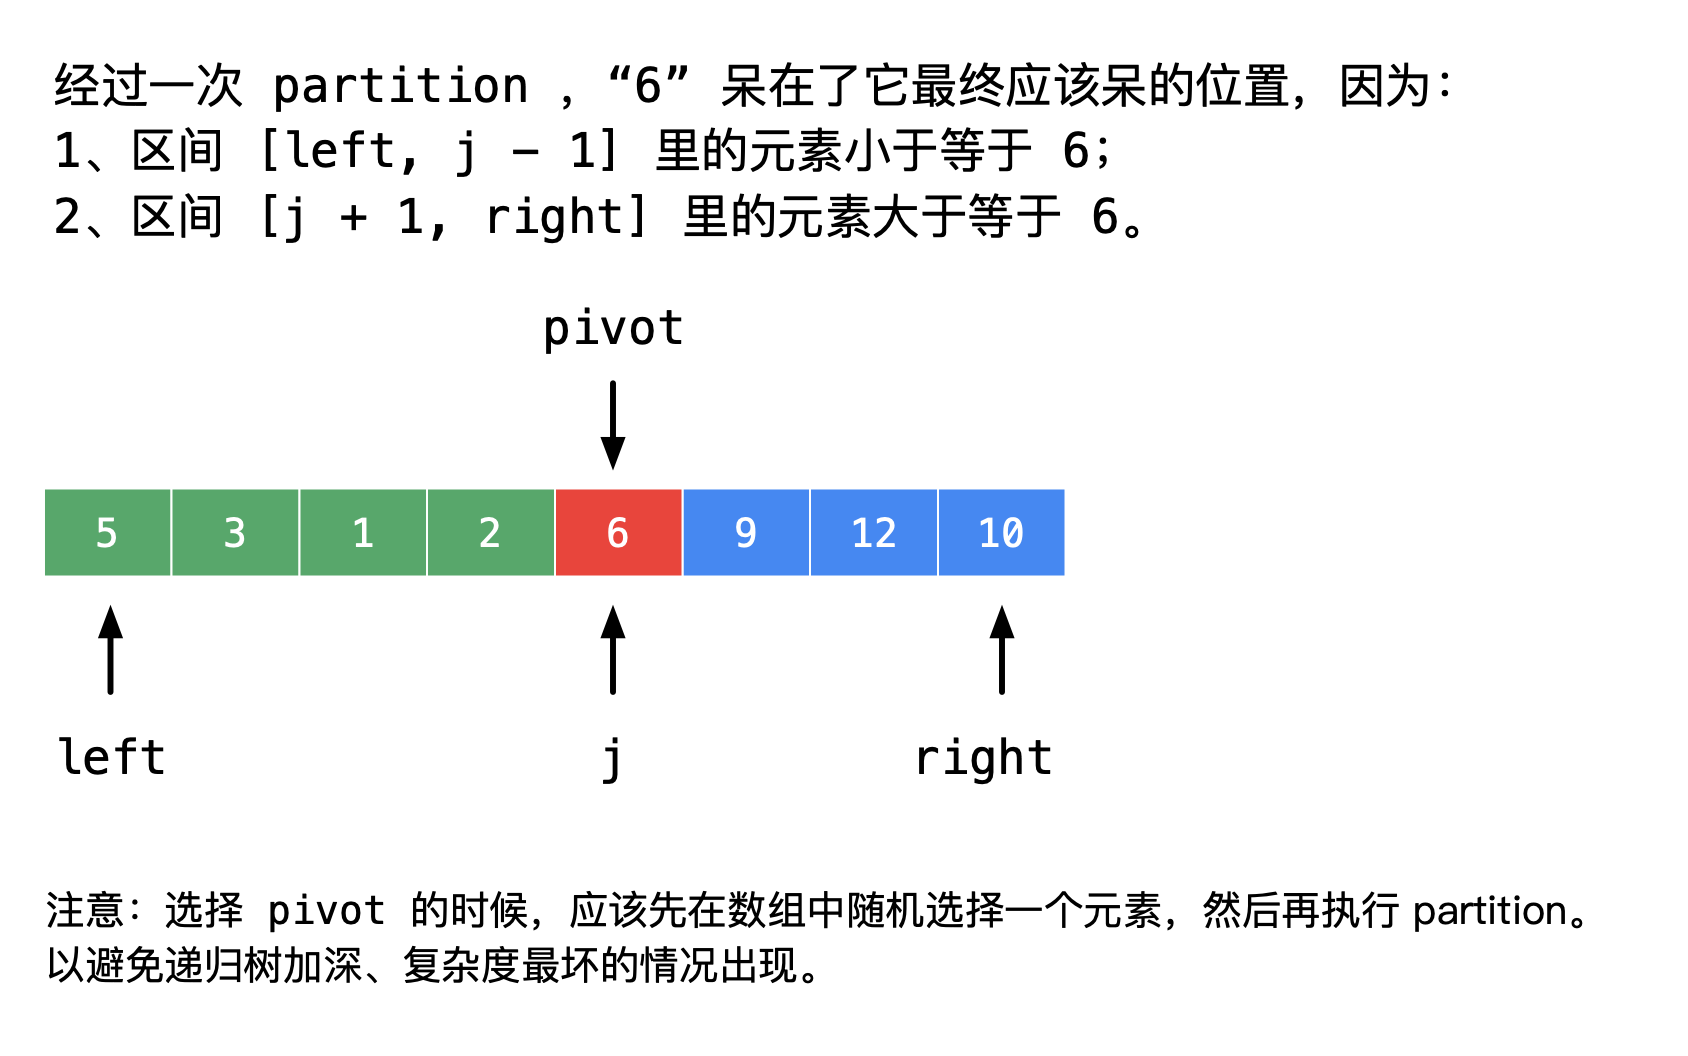

由此可以发现每次经过「切分」操作后，我们一定可以确定一个元素的最终位置，即 $\mathcal{x}$ 的最终位置为 $\mathcal{q}$，并且保证 $\mathcal{a[l \cdots q - 1]}$ 中的每个元素小于等于 $\mathcal{a[q]}$，且 $\mathcal{a[q]}$ 小于等于 $\mathcal{a[q + 1 \cdots r]}$ 中的每个元素。所以只要某次划分的 $\mathcal{q}$ 为倒数第 $\mathcal{k}$ 个下标的时候，我们就已经找到了答案。 我们只关心这一点，至于 $\mathcal{a[l \cdots q - 1]}$ 和 $\mathcal{a[q + 1 \cdots r]}$ 是否是有序的，我们不关心。

***这里采用双指针的办法找到切分元素的位置。***

### 复杂度分析
* 时间复杂度：$\mathcal{O}(N)$，这里 $\mathcal{N}$ 是数组的长度。
* 空间复杂度：$\mathcal{O}(1)$，原地排序，没有借助额外的辅助空间。
> 注意：本题必须随机初始化 pivot 元素，否则通过时间会很慢，因为测试用例中有极端测试用例。

为了应对极端测试用例，使得递归树加深，可以在循环一开始的时候，随机交换第 1 个元素与它后面的任意 1 个元素的位置；

说明：最极端的是顺序数组与倒序数组，此时递归树画出来是链表，时间复杂度是 $\mathcal{O}(N^2)$，根本达不到减治的效果。

In [ ]:
import random


class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        size = len(nums)

        target = size - k
        left = 0
        right = size - 1
        while True:
            index = self.__partition(nums, left, right)
            if index == target:
                return nums[index]
            elif index < target:
                # 下一轮在 [index + 1, right] 里找
                left = index + 1
            else:
                right = index - 1

    # 循环不变量：
    # [left + 1, lt） <= pivot
    # (rt, right] >= pivot
    def __partition(self, nums, left, right):
        # randint 是包括左右区间的
        random_index = random.randint(left, right)
        nums[random_index], nums[left] = nums[left], nums[random_index]

        pivot = nums[left]

        lt = left + 1
        rt = right

        while True:
            while lt <= rt and nums[lt] < pivot:
                lt += 1
            while lt <= rt and nums[rt] > pivot:
                rt -= 1

            if lt > rt:
                break
            nums[lt], nums[rt] = nums[rt], nums[lt]
            lt += 1
            rt -= 1

        nums[left], nums[rt] = nums[rt], nums[left]
        return rt

## 优先队列
优先队列的思路是很朴素的。因为第 K 大元素，其实就是整个数组排序以后后半部分最小的那个元素。因此，我们可以维护一个有 K 个元素的最小堆：
 1. 如果当前堆不满，直接添加；
 2. 堆满的时候，如果新读到的数小于等于堆顶，肯定不是我们要找的元素，只有新都到的数大于堆顶的时候，才将堆顶拿出，然后放入新读到的数，进而让堆自己去调整内部结构。



In [ ]:
import heapq


class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        head = []
        for i in nums:
            heapq.heappush(head, i)
        for _ in range(len(nums)-k+1):
            res = heapq.heappop(head)
        return res